hello python
/Users/rajesh/work/simulations/full_NABS/full1_1/log.lammps
[array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7')]
1
/Users/rajesh/work/simulations/full_NABS/full1_2/log.lammps
[array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7')]
13
/Users/rajesh/work/simulations/full_NABS/full1_3/log.lammps
[array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7')]
135
/Users/rajesh/work/simulations/full_NABS/full1_4/log.lammps
[array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<U7'), array(['Step', 'Temp', 'PotEng', 'Press', 'Lx', 'Density'], dtype='<

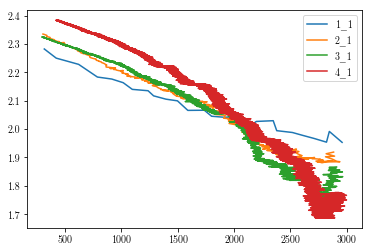

In [64]:
!echo "hello python"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
plt.rc('font', family='CMU Serif',)

matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


data = []
names = []
df = []
for j in range(1,2):
    fig, ax = plt.subplots()
    for i in range(1,5):

        #print(i)
        foldername = '/Users/rajesh/work/simulations/full_NABS/full'+str(j)+'_'+str(i)
        filename = foldername +'/log.lammps'
        print(filename)
        a = [176, 1, 177, 20] 
        a = [176, 1, 177, 260] 
        T = [[176, 1, 177, 28], [176, 1, 177, 271], [176, 1, 177, 2701], [176, 1, 177, 27001]]
        names.append(np.genfromtxt(filename, skip_header=T[i-1][0],max_rows=T[i-1][1],dtype=str))   
        print(names)
        data.append(np.genfromtxt(filename, skip_header=T[i-1][2],max_rows=T[i-1][3],dtype=float))   
       # print(data)
        df.append(pd.DataFrame(data[i-1],columns=names[i-1]))
        mv=T[i-1][3]/20
        mv=int(mv) 
        
        print(mv)
        window=[ 1, 10, 100 ,1000]
        #df.append(pd.DataFrame(data[i],columns=names[i]))
        df[i-1]['Density_moving_avg'] = df[i-1]['Density'].rolling(window=window[i-1]).mean()
        #df[i].to_csv(foldername+'data.csv')
        a=[10, 1, 0.1]
        
        ax.plot(df[i-1]['Temp'],df[i-1]['Density_moving_avg'],label=str(i)+'_'+str(j))
        ax.legend()
        fig.savefig(str(j)+'.png',format=None,dpi=300,bbox_inches="tight")


In [ ]:
ls